In [1]:
#Importing Libraries
import pandas as pd
import seaborn as sns
import numpy as np
import pymongo
import plotly.express as px
import matplotlib.pyplot as plt

Loading the data

In [2]:
#connect to mongodb server
client = pymongo.MongoClient("mongodb://janani:<***>@ac-s8tip5l-shard-00-00.iagoq8n.mongodb.net:27017,ac-s8tip5l-shard-00-01.iagoq8n.mongodb.net:27017,ac-s8tip5l-shard-00-02.iagoq8n.mongodb.net:27017/?ssl=true&replicaSet=atlas-e8jc7c-shard-0&authSource=admin&retryWrites=true&w=majority")

In [3]:
#Database Selection
db = client["sample_airbnb"]

In [4]:
#collection
col = db["listingsAndReviews"]

In [5]:
#Retrieving data from MongoDb collection
data_entries = []
for i in col.find():
    data = dict(
        Id=i['_id'],
        Name=i.get('name'),
        Description=i['description'],
        Property_type=i['property_type'],
        Room_type=i['room_type'],
        Bed_type=i['bed_type'],
        Min_nights=int(i['minimum_nights']),
        Max_nights=int(i['maximum_nights']),
        Cancellation_policy=i['cancellation_policy'],
        Accommodates=i['accommodates'],
        Total_bedrooms=i.get('bedrooms'),
        Total_beds=i.get('beds'),
        Availability_365=i['availability']['availability_365'],
        Price=i['price'],
        Extra_people=i['extra_people'],
        Guests_included=i['guests_included'],
        review_count=int(i['number_of_reviews']),
        Review_scores=i['review_scores'].get('review_scores_rating'),
        Amenities=', '.join(i['amenities']),
        Host_id=i['host']['host_id'],
        Host_name=i['host']['host_name'],
        Street=i['address']['street'],
        Country=i['address']['country'],
        Longitude=i['address']['location']['coordinates'][0],
        Latitude=i['address']['location']['coordinates'][1],
        Neighbourhood=i['host']['host_neighbourhood'],
        Listing_count = i['host']['host_total_listings_count']
    )
    data_entries.append(data)    

In [6]:
# Creating a DataFrame
df = pd.DataFrame(data_entries)
df

,Id,Name,Description,Property_type,Room_type,Bed_type,Min_nights,Max_nights,Cancellation_policy,Accommodates,...,Review_scores,Amenities,Host_id,Host_name,Street,Country,Longitude,Latitude,Neighbourhood,Listing_count
0,10009999,Horto flat with small garden,One bedroom + sofa-bed in quiet and bucolic ne...,Apartment,Entire home/apt,Real Bed,2,1125,flexible,4,...,NaN,"Wifi, Wheelchair accessible, Kitchen, Free par...",1282196,Ynaie,"Rio de Janeiro, Rio de Janeiro, Brazil",Brazil,-43.230750,-22.966254,Jardim Botânico,1
1,10057826,Deluxe Loft Suite,Loft Suite Deluxe @ Henry Norman Hotel Located...,Apartment,Entire home/apt,Real Bed,3,1125,strict_14_with_grace_period,4,...,88.0,"TV, Cable TV, Internet, Wifi, Air conditioning...",47554473,Mae,"Brooklyn, NY, United States",United States,-73.944720,40.727780,Greenpoint,13
2,10069642,Ótimo Apto proximo Parque Olimpico,Apartamento próximo ao centro dos Jogos Olímpi...,Apartment,Entire home/apt,Real Bed,15,20,strict_14_with_grace_period,5,...,NaN,"TV, Cable TV, Internet, Wifi, Air conditioning...",51670240,Jonathan,"Rio de Janeiro, Rio de Janeiro, Brazil",Brazil,-43.431112,-23.000358,,1
3,10082422,Nice room in Barcelona Center,Hi! Cozy double bed room in amazing flat next...,Apartment,Private room,Real Bed,1,9,flexible,2,...,NaN,"Internet, Wifi, Kitchen, Elevator, Heating, Wa...",30393403,Anna,"Barcelona, Catalunya, Spain",Spain,2.169420,41.400820,Dreta de l'Eixample,1
4,10115921,GOLF ROYAL RESİDENCE TAXİM(1+1):3,our place situated at the middle of beautiful ...,Serviced apartment,Entire home/apt,Real Bed,1,1125,strict_14_with_grace_period,4,...,67.0,"TV, Cable TV, Internet, Wifi, Air conditioning...",51471538,Ahmet,"Şişli, İstanbul, Turkey",Turkey,28.987130,41.048410,Şişli,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5550,9867316,Beautiful Place in the Middle of Manhattan,Beautiful place only a couple blocks from main...,Apartment,Entire home/apt,Real Bed,1,1125,strict_14_with_grace_period,2,...,92.0,"Wifi, Air conditioning, Kitchen, Pets allowed,...",40540485,Miguel,"New York, NY, United States",United States,-73.962050,40.762660,Upper East Side,1
5551,9917859,StayIN Oporto Música - Apartment,Acabamos de decorar-lo para receber os primeir...,Apartment,Entire home/apt,Real Bed,1,1125,strict_14_with_grace_period,16,...,89.0,"TV, Cable TV, Wifi, Kitchen, Elevator, Heating...",2296185,Manuel,"Porto, Porto, Portugal",Portugal,-8.606220,41.151270,,3
5552,9936016,Alugo Apartamento na Tijuca,Apartamento amplo que acomoda 6 pessoas. Um qu...,Apartment,Entire home/apt,Real Bed,1,1125,flexible,6,...,NaN,"TV, Cable TV, Internet, Wifi, Air conditioning...",47092481,Aliane,"Rio de Janeiro, Rio de Janeiro, Brazil",Brazil,-43.173761,-22.908336,,1
5553,9979991,,"Located at the heart of Kowloon, our unit is s...",Apartment,Entire home/apt,Real Bed,1,1125,flexible,3,...,NaN,"TV, Internet, Air conditioning, Kitchen, Eleva...",51283546,Alexis,"Hong Kong, Kowloon, Hong Kong",Hong Kong,114.169630,22.315690,,1


In [7]:
df.shape

(5555, 27)

In [8]:
df.size

149985

Displaying Columns data types

In [9]:
#List of columns in the dataset
df.columns.to_list()

['Id',
 'Name',
 'Description',
 'Property_type',
 'Room_type',
 'Bed_type',
 'Min_nights',
 'Max_nights',
 'Cancellation_policy',
 'Accommodates',
 'Total_bedrooms',
 'Total_beds',
 'Availability_365',
 'Price',
 'Extra_people',
 'Guests_included',
 'review_count',
 'Review_scores',
 'Amenities',
 'Host_id',
 'Host_name',
 'Street',
 'Country',
 'Longitude',
 'Latitude',
 'Neighbourhood',
 'Listing_count']

In [10]:
#Data types of columns
df.dtypes

Id                      object
Name                    object
Description             object
Property_type           object
Room_type               object
Bed_type                object
Min_nights               int64
Max_nights               int64
Cancellation_policy     object
Accommodates             int64
Total_bedrooms         float64
Total_beds             float64
Availability_365         int64
Price                   object
Extra_people            object
Guests_included         object
review_count             int64
Review_scores          float64
Amenities               object
Host_id                 object
Host_name               object
Street                  object
Country                 object
Longitude              float64
Latitude               float64
Neighbourhood           object
Listing_count            int64
dtype: object

In [11]:
#Total rows and columns
print("There are {} rows and {} columns in the dataset".format(df.shape[0], df.shape[1]))

There are 5555 rows and 27 columns in the dataset


In [12]:
#stastical summary of important numerical parameters
df[['Price','Min_nights','Max_nights','review_count','Review_scores','Listing_count','Availability_365']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Min_nights,5555.0,5.564356e+00,2.261386e+01,1.0,1.0,2.0,3.0,1.250000e+03
Max_nights,5555.0,1.382776e+06,5.256920e+07,1.0,59.0,1125.0,1125.0,2.147484e+09
review_count,5555.0,2.760648e+01,4.979838e+01,0.0,1.0,5.0,32.0,5.330000e+02
Review_scores,4081.0,9.309924e+01,9.023483e+00,20.0,90.0,95.0,99.0,1.000000e+02
Listing_count,5555.0,1.440576e+01,6.584887e+01,0.0,1.0,2.0,6.0,1.198000e+03
Availability_365,5555.0,1.731057e+02,1.398419e+02,0.0,17.0,171.0,317.0,3.650000e+02


Data cleaning

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5555 entries, 0 to 5554
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   5555 non-null   object 
 1   Name                 5555 non-null   object 
 2   Description          5555 non-null   object 
 3   Property_type        5555 non-null   object 
 4   Room_type            5555 non-null   object 
 5   Bed_type             5555 non-null   object 
 6   Min_nights           5555 non-null   int64  
 7   Max_nights           5555 non-null   int64  
 8   Cancellation_policy  5555 non-null   object 
 9   Accommodates         5555 non-null   int64  
 10  Total_bedrooms       5550 non-null   float64
 11  Total_beds           5542 non-null   float64
 12  Availability_365     5555 non-null   int64  
 13  Price                5555 non-null   object 
 14  Extra_people         5555 non-null   object 
 15  Guests_included      5555 non-null   o

In [14]:
# The below features are in Decimal128 type hence changing it to relevant data types
df.Price = df.Price.astype(str).astype(float)
df.Extra_people = df.Extra_people.astype(str).astype(float)
df.Guests_included = df.Guests_included.astype(str).astype(float)
df.Review_scores = df.Review_scores.astype('Int64')


In [15]:
#Removing the Duplicates if any
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [16]:
df.duplicated().sum()

0

There are no duplicate rows in the dataset

In [17]:
#count of missing values in the dataset
df.isnull().sum()

Id                        0
Name                      0
Description               0
Property_type             0
Room_type                 0
Bed_type                  0
Min_nights                0
Max_nights                0
Cancellation_policy       0
Accommodates              0
Total_bedrooms            5
Total_beds               13
Availability_365          0
Price                     0
Extra_people              0
Guests_included           0
review_count              0
Review_scores          1474
Amenities                 0
Host_id                   0
Host_name                 0
Street                    0
Country                   0
Longitude                 0
Latitude                  0
Neighbourhood             0
Listing_count             0
dtype: int64

Missing values are found in 'Total_bedrooms ','Total_beds'and 'Review_scores' columns.

In [18]:
# Replacing missing values in 'total_bedroon',Reciew_scores,'Total_beds' columns with 'Unknown'
df["Total_bedrooms"].replace(np.nan, "Unknown", inplace=True)
df["Total_beds"].replace(np.nan, "Unknown", inplace=True)


In [19]:
 #Replacing missing values in Review_scores, columns with 0
df['Review_scores'].replace(np.nan, 0, inplace=True)

In [20]:
#count of null values
df.isnull().sum()

Id                     0
Name                   0
Description            0
Property_type          0
Room_type              0
Bed_type               0
Min_nights             0
Max_nights             0
Cancellation_policy    0
Accommodates           0
Total_bedrooms         0
Total_beds             0
Availability_365       0
Price                  0
Extra_people           0
Guests_included        0
review_count           0
Review_scores          0
Amenities              0
Host_id                0
Host_name              0
Street                 0
Country                0
Longitude              0
Latitude               0
Neighbourhood          0
Listing_count          0
dtype: int64

As shown in the above columnwise summary, all the NaN values in the dataset has been replaced.

Categorical and numerical columns in the dataset

In [21]:
print("Categorical columns are:\n",df.select_dtypes(include=['object']).columns)
print("\nNumerical columns are:\n",df.select_dtypes(exclude=['object']).columns)

Categorical columns are:
 Index(['Id', 'Name', 'Description', 'Property_type', 'Room_type', 'Bed_type',
       'Cancellation_policy', 'Total_bedrooms', 'Total_beds', 'Amenities',
       'Host_id', 'Host_name', 'Street', 'Country', 'Neighbourhood'],
      dtype='object')

Numerical columns are:
 Index(['Min_nights', 'Max_nights', 'Accommodates', 'Availability_365', 'Price',
       'Extra_people', 'Guests_included', 'review_count', 'Review_scores',
       'Longitude', 'Latitude', 'Listing_count'],
      dtype='object')


Unique values of categorical columns

In [22]:
columns = ['Property_type','Bed_type','Country', 'Room_type']
for column in columns:
    print('\033[1m',column,'\033[0m')
    print("Unique Values:",df[column].unique())
    print("Length:",df[column].nunique(),"\n")

 Property_type 
Unique Values: ['Apartment' 'Serviced apartment' 'Bed and breakfast' 'House'
 'Condominium' 'Loft' 'Hostel' 'Guesthouse' 'Bungalow' 'Treehouse'
 'Guest suite' 'Townhouse' 'Cabin' 'Villa' 'Other' 'Chalet' 'Farm stay'
 'Cottage' 'Boat' 'Boutique hotel' 'Earth house' 'Aparthotel' 'Resort'
 'Tiny house' 'Nature lodge' 'Hotel' 'Hut' 'Casa particular (Cuba)' 'Barn'
 'Camper/RV' 'Heritage hotel (India)' 'Pension (South Korea)' 'Campsite'
 'Houseboat' 'Castle' 'Train']
Length: 36 

 Bed_type 
Unique Values: ['Real Bed' 'Pull-out Sofa' 'Futon' 'Airbed' 'Couch']
Length: 5 

 Country 
Unique Values: ['Brazil' 'United States' 'Spain' 'Turkey' 'Australia' 'Canada' 'Portugal'
 'Hong Kong' 'China']
Length: 9 

 Room_type 
Unique Values: ['Entire home/apt' 'Private room' 'Shared room']
Length: 3 



Analysis of data distribution of important numerical parameters.

c:\Users\Admin\Desktop\Airbnb\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Admin\Desktop\Airbnb\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Admin\Desktop\Airbnb\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Admin\Desktop\Airbnb\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values

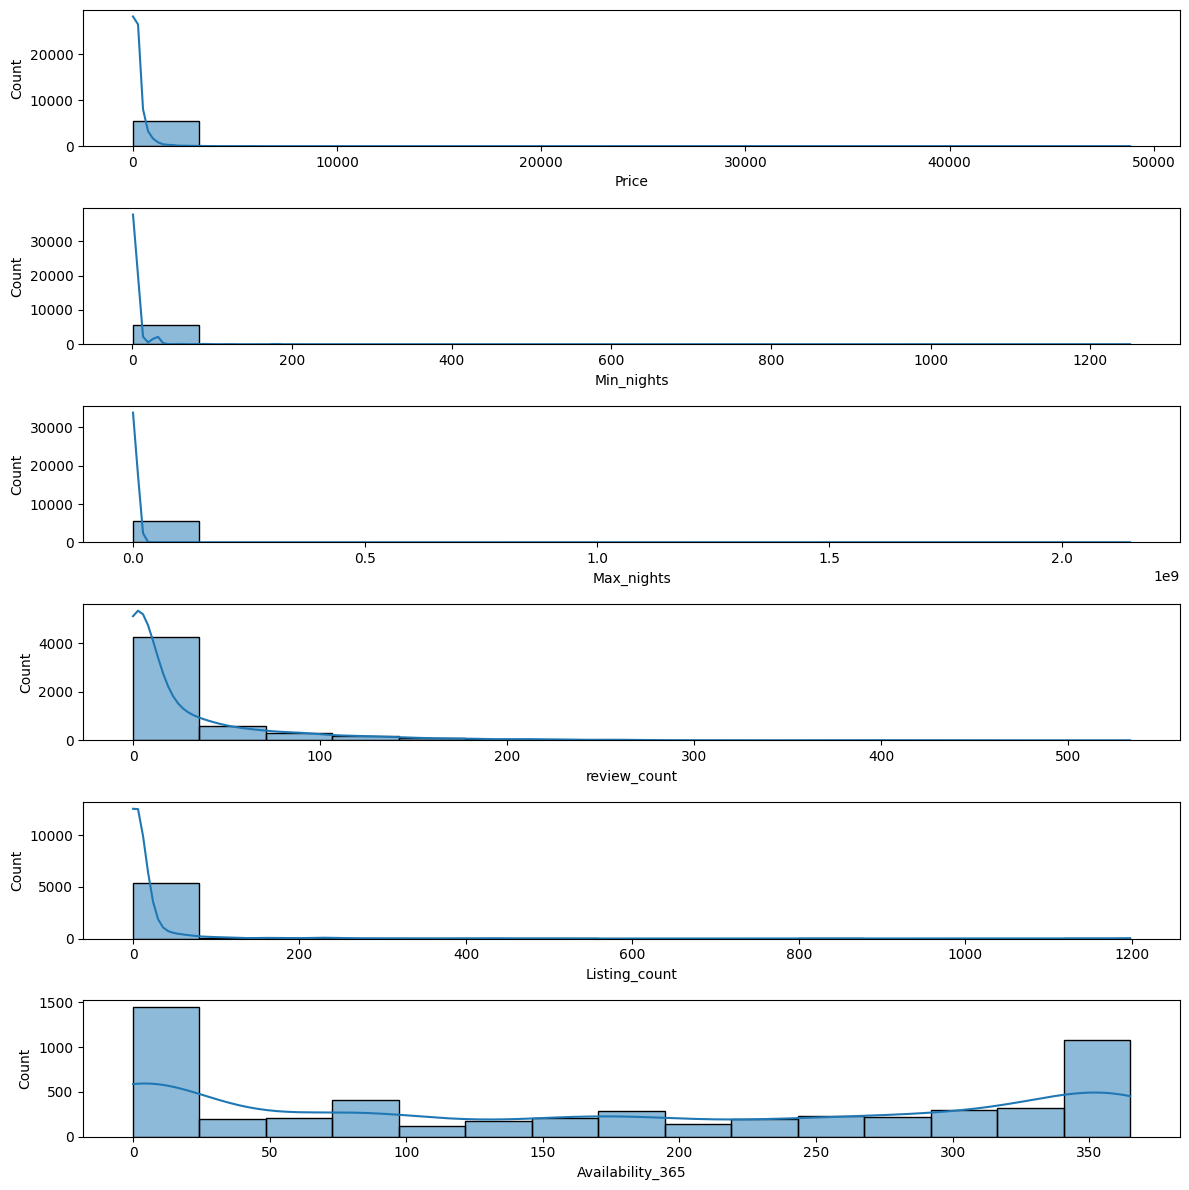

In [23]:
"""Histplots for relevant numerical columns:Price', 'minimum_nights','Maximum_nights, 'review_count','listing_count', 'Availability_365'"""

selected_columns = ['Price','Min_nights','Max_nights','review_count','Listing_count','Availability_365']


fig, axes = plt.subplots(nrows=len(selected_columns), ncols=1, figsize=(12,12))
for i, col in enumerate(selected_columns):
    sns.histplot(df[col], kde=True, bins = 15,ax=axes[i])
    
plt.tight_layout()
plt.show()

---->'review count' column values shows wide variation as it depends upon customer preference and popularity of each property or location and willingness to provide feedback.



----->Apart from these rows, the histograms for 'price', 'min_nights',max_night ,shows wide range of distribution. These columns should be analysed further for outlier detection.



----->Calculated listings_count, which is the number of properties owned by a host ranges from 1 to more than 1200.


------>Maximum availability is 365 days which means that a few properties are available for an entire year, which could be because these listings have not recieved any bookings yet or they are currently not operating.

In [24]:
count_365 =(df['Availability_365']==365).sum()
count_365

412

There are 412 properties listed with an availability of 365 days.

Analaysing 'price' and 'minimum_nights' columns for outlier detection

Price


In [25]:
#Stastical summary of price
df.Price.describe()

count     5555.000000
mean       278.766157
std        842.215531
min          9.000000
25%         70.000000
50%        129.000000
75%        280.000000
max      48842.000000
Name: Price, dtype: float64

Minimum price is 9 and maximum is 48842 dollars and average price is around 278 dollars and 75% of price values is under 280 dollars

c:\Users\Admin\Desktop\Airbnb\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


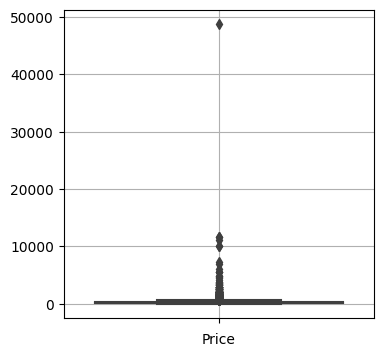

In [26]:
#Box plot for price column

plt.figure(figsize=(4,4))  
sns.boxplot(y=df.Price)
plt.xlabel('Price')
plt.grid(True)
plt.gca().set(ylabel='')
plt.show()

In [27]:
# checking for prices values above 1000
price_greaterthan_1000 =len(df[df['Price'] > 1000])
print("Number of price values greater than 1000 :",price_greaterthan_1000)

percentage = round((price_greaterthan_1000/df.shape[0])*100,2)
print("Percentage :",percentage,"%")

Number of price values greater than 1000 : 208
Percentage : 3.74 %


In [28]:
# checking for prices values below 1000
price_lesserthan_1000 =len(df[df['Price'] < 1000])
print("Number of price values lesser than 1000 :",price_lesserthan_1000)

percentage = round((price_lesserthan_1000/df.shape[0])*100,2)
print("Percentage :",percentage,"%")

Number of price values lesser than 1000 : 5336
Percentage : 96.06 %


As listed above, we have only 208 (3.74%) price values above 1000 and 5336(96.06 percent) values, where price lesser than 1000

In [30]:

df['Price'] = df['Price'].where(df['Price'] <= 1000, np.nan)

df['Price'].isnull().sum()

208

Removing price outliers using IQR Method

In [31]:
column = 'Price'

#Lower and upper quartiles
Q1 = df[column].quantile(0.25)
Q3 = df[column].quantile(0.75)


#IQR (Interquartile Range)
IQR = Q3 - Q1

#lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower Bound=",lower_bound,"\nUpper Bound=",upper_bound)

# Detecting outliers based on the bounds
print("Outliers detected using IQR Method:")
outlier = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
outlier

Lower Bound= -205.0 
Upper Bound= 523.0
Outliers detected using IQR Method:


,Id,Name,Description,Property_type,Room_type,Bed_type,Min_nights,Max_nights,Cancellation_policy,Accommodates,...,Review_scores,Amenities,Host_id,Host_name,Street,Country,Longitude,Latitude,Neighbourhood,Listing_count
2,10069642,Ótimo Apto proximo Parque Olimpico,Apartamento próximo ao centro dos Jogos Olímpi...,Apartment,Entire home/apt,Real Bed,15,20,strict_14_with_grace_period,5,...,0,"TV, Cable TV, Internet, Wifi, Air conditioning...",51670240,Jonathan,"Rio de Janeiro, Rio de Janeiro, Brazil",Brazil,-43.431112,-23.000358,,1
4,10115921,GOLF ROYAL RESİDENCE TAXİM(1+1):3,our place situated at the middle of beautiful ...,Serviced apartment,Entire home/apt,Real Bed,1,1125,strict_14_with_grace_period,4,...,67,"TV, Cable TV, Internet, Wifi, Air conditioning...",51471538,Ahmet,"Şişli, İstanbul, Turkey",Turkey,28.987130,41.048410,Şişli,16
5,10116578,Apartamento zona sul do RJ,"próximo aos principais pontos turísticos,,do l...",Apartment,Entire home/apt,Real Bed,1,1125,flexible,5,...,0,"Cable TV, Wifi, Air conditioning, Wheelchair a...",51915770,Luiz Rodrigo,"Rio de Janeiro, Rio de Janeiro, Brazil",Brazil,-43.182595,-22.930541,,1
12,10317142,Private OceanFront - Bathtub Beach. Spacious H...,Ocean Living! Secluded Secret Beach! Less than...,House,Entire home/apt,Real Bed,3,1125,strict_14_with_grace_period,14,...,94,"TV, Cable TV, Internet, Wifi, Wheelchair acces...",53086419,Noah,"Laie, HI, United States",United States,-157.919520,21.635490,Ko'olauloa,1
16,10459480,Greenwich Fun and Luxury,Fabulous architect-designed home with incredib...,House,Entire home/apt,Real Bed,5,1125,flexible,6,...,0,"TV, Internet, Wifi, Air conditioning, Pool, Ki...",45186586,Craig,"Greenwich, NSW, Australia",Australia,151.185630,-33.828900,Greenwich,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5492,9895628,Duplex com vista para o J. Botanico,O apartamento é amplo e localizado em rua tran...,Apartment,Entire home/apt,Real Bed,5,1125,flexible,8,...,100,"Cable TV, Wifi, Air conditioning, Kitchen, Fre...",14856657,Mah,"Rio de Janeiro, Rio de Janeiro, Brazil",Brazil,-43.220452,-22.963607,Jardim Botânico,1
5501,9677123,MALL OF İSTANBUL 3+1 RENTAL DAY,"Hello, our house has 5 km from the city center...",Apartment,Entire home/apt,Real Bed,1,1125,flexible,7,...,0,,9086931,Hakan,"Küçükçekmece İkitelli Mehmet Akif, İstanbul, T...",Turkey,28.807580,41.062240,,5
5502,9698778,Prestigious Seaside Apartment,This spectacular modern day apartment is situa...,Apartment,Entire home/apt,Real Bed,4,1125,flexible,2,...,0,"TV, Cable TV, Internet, Wifi, Air conditioning...",50085110,Sam,"Kennedy Town, Hong Kong Island, Hong Kong",Hong Kong,114.119710,22.280330,Kennedy Town,2
5545,9908871,Family friendly beach house,"Only 400 metres to the beach,2 x carparks,clos...",House,Entire home/apt,Real Bed,1,1125,flexible,6,...,0,"TV, Cable TV, Kitchen, Free parking on premise...",20914019,Craig,"North Bondi, NSW, Australia",Australia,151.282410,-33.888180,North Bondi,1


In [32]:
print("There are {} outliers in price  ".format(outlier.shape[0]))
print ("Percentage of outliers in price :",round((outlier.shape[0]/df.shape[0])*100,2),"%")

There are 456 outliers in price  
Percentage of outliers in price : 8.21 %


In [33]:
#Removing price outliers
df=df[(df[column]>lower_bound) & (df[column]<upper_bound)]
df

,Id,Name,Description,Property_type,Room_type,Bed_type,Min_nights,Max_nights,Cancellation_policy,Accommodates,...,Review_scores,Amenities,Host_id,Host_name,Street,Country,Longitude,Latitude,Neighbourhood,Listing_count
0,10009999,Horto flat with small garden,One bedroom + sofa-bed in quiet and bucolic ne...,Apartment,Entire home/apt,Real Bed,2,1125,flexible,4,...,0,"Wifi, Wheelchair accessible, Kitchen, Free par...",1282196,Ynaie,"Rio de Janeiro, Rio de Janeiro, Brazil",Brazil,-43.23075,-22.966254,Jardim Botânico,1
1,10057826,Deluxe Loft Suite,Loft Suite Deluxe @ Henry Norman Hotel Located...,Apartment,Entire home/apt,Real Bed,3,1125,strict_14_with_grace_period,4,...,88,"TV, Cable TV, Internet, Wifi, Air conditioning...",47554473,Mae,"Brooklyn, NY, United States",United States,-73.94472,40.727780,Greenpoint,13
3,10082422,Nice room in Barcelona Center,Hi! Cozy double bed room in amazing flat next...,Apartment,Private room,Real Bed,1,9,flexible,2,...,0,"Internet, Wifi, Kitchen, Elevator, Heating, Wa...",30393403,Anna,"Barcelona, Catalunya, Spain",Spain,2.16942,41.400820,Dreta de l'Eixample,1
6,10133554,Double and triple rooms Blue mosque,We are on the central city Blue mosque 5 minu...,Bed and breakfast,Private room,Real Bed,1,1125,moderate,3,...,92,"Internet, Wifi, Air conditioning, Free parking...",52004703,Mehmet Emin,"Fatih , İstanbul, Turkey",Turkey,28.98009,41.006200,,2
7,10138784,Room Close to LGA and 35 mins to Times Square,A private small bedroom in a 2 BR 1BA apartmen...,Apartment,Private room,Real Bed,2,1125,strict_14_with_grace_period,2,...,99,"Internet, Wifi, Air conditioning, Pets live on...",52031360,Cheer,"Queens, NY, United States",United States,-73.88025,40.749530,Jackson Heights,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5548,9983221,Cozy apartment downtown Porto,"Renovated, fully equipped, within walking dist...",Apartment,Entire home/apt,Real Bed,3,1125,strict_14_with_grace_period,4,...,98,"TV, Cable TV, Internet, Wifi, Kitchen, Paid pa...",37776205,Ana,"Porto, Porto, Portugal",Portugal,-8.61693,41.151370,,8
5549,9985696,Kadıköy-Altıyol,Kadıköy merkezde 2+1 dairem vardır.Çok kalabal...,House,Entire home/apt,Real Bed,1,1125,flexible,2,...,0,"TV, Cable TV, Internet, Wifi, Kitchen, Buzzer/...",51303748,Eren,"Kadıköy, İstanbul, Turkey",Turkey,29.03079,40.985630,,2
5550,9867316,Beautiful Place in the Middle of Manhattan,Beautiful place only a couple blocks from main...,Apartment,Entire home/apt,Real Bed,1,1125,strict_14_with_grace_period,2,...,92,"Wifi, Air conditioning, Kitchen, Pets allowed,...",40540485,Miguel,"New York, NY, United States",United States,-73.96205,40.762660,Upper East Side,1
5551,9917859,StayIN Oporto Música - Apartment,Acabamos de decorar-lo para receber os primeir...,Apartment,Entire home/apt,Real Bed,1,1125,strict_14_with_grace_period,16,...,89,"TV, Cable TV, Wifi, Kitchen, Elevator, Heating...",2296185,Manuel,"Porto, Porto, Portugal",Portugal,-8.60622,41.151270,,3


c:\Users\Admin\Desktop\Airbnb\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


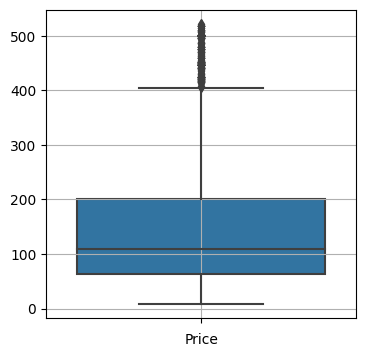

In [34]:
# Box plot of price after removal of outliers
plt.figure(figsize=(4,4))  
sns.boxplot(y=df.Price)
plt.xlabel('Price')
plt.grid(True)
plt.gca().set(ylabel='')
plt.show()

c:\Users\Admin\Desktop\Airbnb\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Admin\Desktop\Airbnb\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


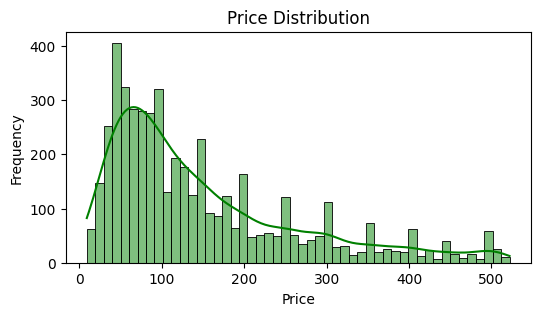

In [35]:
#Frequency distribution of price after removal of outliers
plt.figure(figsize=(6,3))
sns.histplot(df['Price'], bins=50, kde=True,color ="green")
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution')
plt.show()

Minimum Nights

In [36]:
#Statistical summary of minimum_nights
df.Min_nights.describe()

count    4891.000000
mean        5.699039
std        23.715970
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max      1250.000000
Name: Min_nights, dtype: float64

Minimum number of nights for which guest is supposed to book property is 1 night and maximum is 1250 nights. 75% of values are below 3 nights.

c:\Users\Admin\Desktop\Airbnb\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


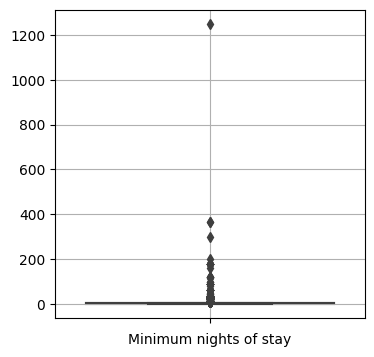

In [37]:
# Box plot for minimum_nights

plt.figure(figsize=(4,4))  
sns.boxplot(y=df.Min_nights)
plt.xlabel('Minimum nights of stay')
plt.grid(True)
plt.gca().set(ylabel='')
plt.show()

There is a wide spread in the minimum_nights values.

Analysing minimum_nights values above 30

In [38]:
print("Total number of values above 30 nights")
print(len(df[df['Min_nights']>30]))
percentage = round((len(df[df['Min_nights']>30])/df.shape[0])*100,2)
print("Percentage :",percentage,"%")

Total number of values above 30 nights
179
Percentage : 3.66 %


There are only 179 (3.66 %) values in minimum_nights which are above 30.

Distribution of properties with minimum nights less than 30.

c:\Users\Admin\Desktop\Airbnb\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Admin\Desktop\Airbnb\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Frequency')

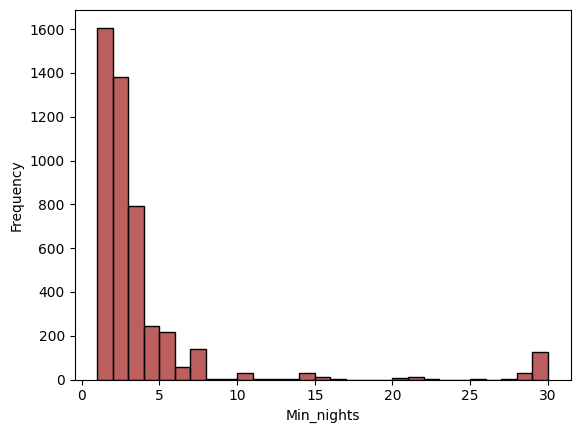

In [39]:
sns.histplot(df[df['Min_nights'] <= 30], x='Min_nights', binwidth=1, kde=False, color='brown')
plt.ylabel('Frequency')

Majority of properties have a low minimum stay requirement (between 1 to 5 nights). As mentioned above, there are only 3.66 % of values with minimum_nights requirement above 30 and more than 75% values are less than 5 nights. Therefore considering them to be outliers and removing them.

In [40]:
df1 = df[df['Min_nights']<=30]

c:\Users\Admin\Desktop\Airbnb\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


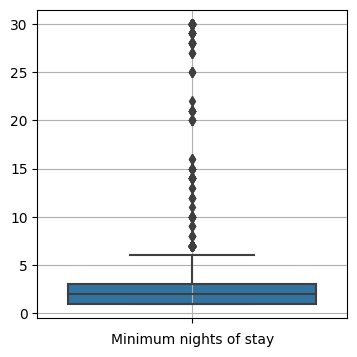

In [41]:
# boxplot of minimum nights

plt.figure(figsize=(4,4))  
sns.boxplot(y=df1.Min_nights)
plt.xlabel('Minimum nights of stay')
plt.grid(True)
plt.gca().set(ylabel='')
plt.show()

Min_nights still has some outliers, but these values are being retained, considering 30 nights as minimum_stay threshold.

In [42]:
df1.shape

(4712, 27)

There are now 45221 rows after removing outliers.

EXPLORATORY DATA ANALYSIS

Correlation between important numerical parameters

In [43]:
selected_columns = df[['Price', 'Min_nights', 'review_count', 'Review_scores', 'Listing_count',"Availability_365"]]

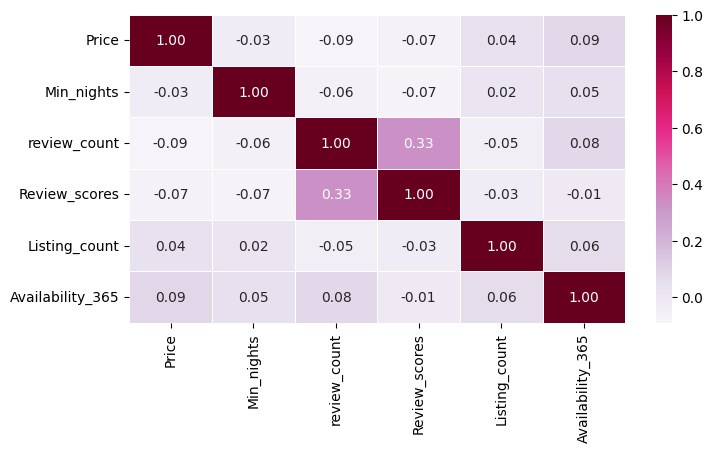

In [44]:
#calculation of correlation matrix
correlation_matrix = selected_columns.corr()
plt.figure(figsize=(8,4))
sns.heatmap(correlation_matrix, annot=True, cmap='PuRd', fmt='.2f', linewidths=0.5)
plt.show()

Most common Room type

c:\Users\Admin\Desktop\Airbnb\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Admin\Desktop\Airbnb\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Admin\Desktop\Airbnb\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


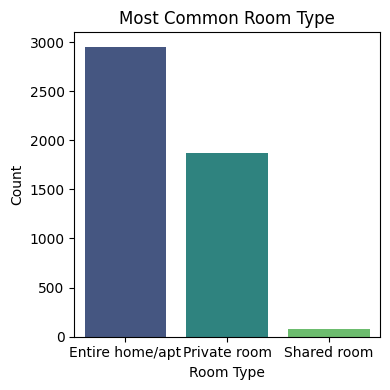

In [45]:
plt.figure(figsize=(4,4))
sns.countplot(data=df, x='Room_type', palette='viridis')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.title('Most Common Room Type')
plt.tight_layout()
plt.show()

Among the three different room types, Entire homes or apartments are maximum in number, followed by private rooms. Customer preference for shared rooms are very low.

c:\Users\Admin\Desktop\Airbnb\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Admin\Desktop\Airbnb\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Admin\Desktop\Airbnb\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


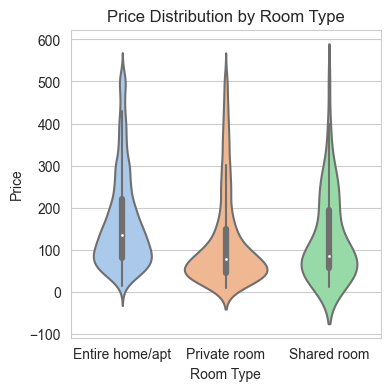

In [47]:
#price distribution by room type
sns.set_style('whitegrid')
plt.figure(figsize=(4,4))
sns.violinplot(x='Room_type', y='Price', data=df, palette='pastel')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.title('Price Distribution by Room Type')
plt.show()

c:\Users\Admin\Desktop\Airbnb\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Admin\Desktop\Airbnb\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Admin\Desktop\Airbnb\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


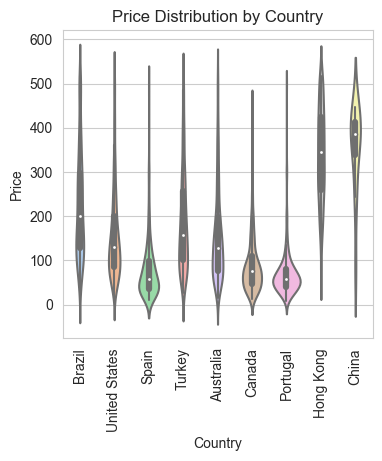

In [48]:
#price distribution by countries
sns.set_style('whitegrid')
plt.figure(figsize=(4,4))
sns.violinplot(x='Country', y='Price', data=df, palette='pastel')
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Price')
plt.title('Price Distribution by Country')
plt.show()

Average price according to room type in different countries


In [49]:
average_price = df1.groupby(['Country','Room_type'])['Price'].mean().unstack(level=1)
average_price

Room_type,Entire home/apt,Private room,Shared room
Country,,,
Australia,199.991453,82.481132,56.200000
Brazil,249.152824,171.564626,68.000000
Canada,108.073634,52.754098,49.250000
China,395.000000,321.750000,86.000000
Hong Kong,400.125000,339.712121,238.869565
Portugal,76.145414,41.198020,17.200000
Spain,135.766667,45.939394,18.500000
Turkey,250.787736,155.418879,111.363636
United States,190.074442,89.318182,58.285714


Text(0, 0.5, 'Price')

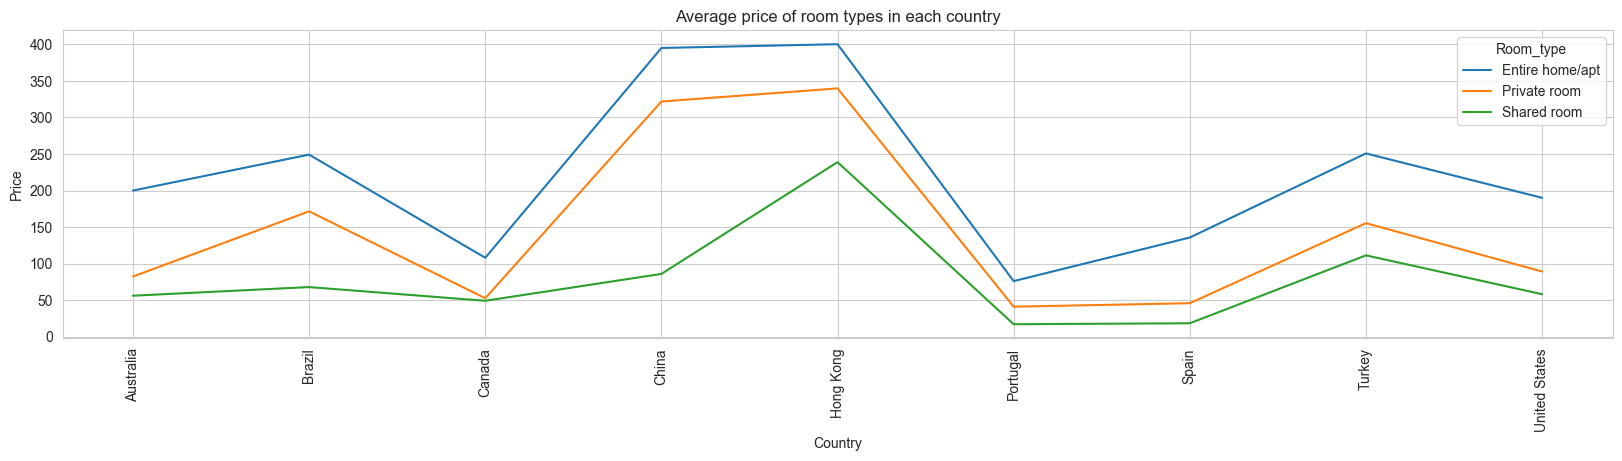

In [50]:
average_price.plot(kind='line',figsize=(20,4))
plt.title('Average price of room types in each country')
plt.xlabel('Country')
plt.xticks(rotation=90)
plt.ylabel('Price')

Based on location and room type price of the listing varies. In all the neighbourhoods entire homes or apartments are expensive compared to private rooms and shared rooms.

Availability of Properties Across Neighborhood Groups for Different Room Types

In [51]:
# Grouping by countries and room type, and summing up availability
print("Availability(in days) of properties across countries:")
availability = df1.groupby(['Country', 'Room_type'])['Availability_365'].mean().unstack()
availability

Availability(in days) of properties across countries:


Room_type,Entire home/apt,Private room,Shared room
Country,,,
Australia,103.857550,87.325472,72.200000
Brazil,177.574751,227.353741,269.750000
Canada,101.313539,106.289617,224.000000
China,255.800000,206.000000,365.000000
Hong Kong,126.625000,164.489899,164.826087
Portugal,251.178971,237.336634,325.200000
Spain,219.285714,129.747475,355.500000
Turkey,247.905660,252.834808,250.227273
United States,174.990074,133.903409,263.285714


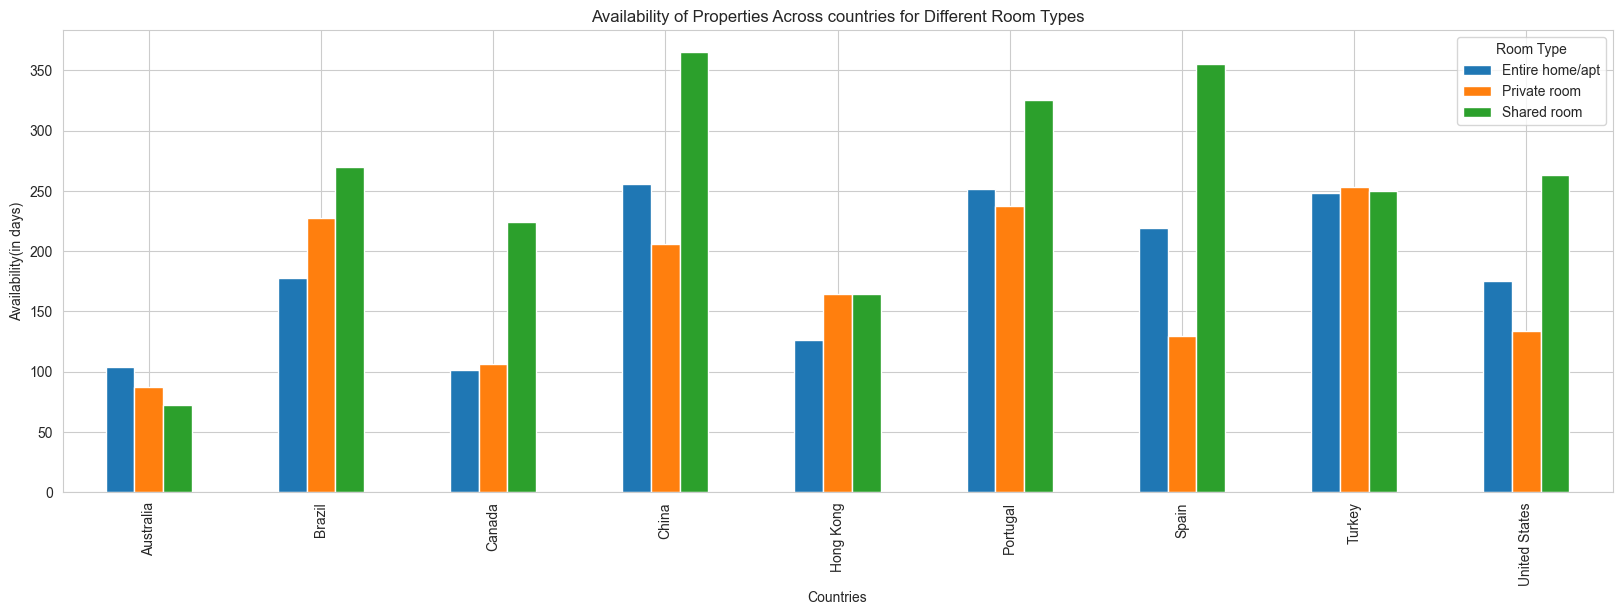

In [52]:
ax = availability.plot(kind='bar',figsize=(20,6))
ax.set_title('Availability of Properties Across countries for Different Room Types')
ax.set_xlabel('Countries')
ax.set_ylabel('Availability(in days)')
plt.legend(title='Room Type')
plt.show()

Correlation between price and Review_count

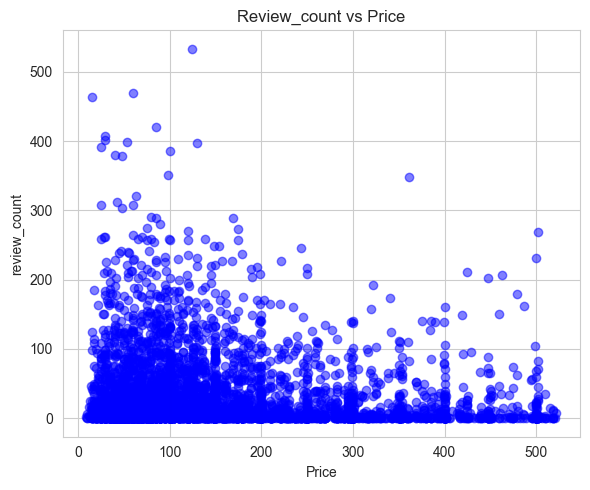

In [53]:
plt.figure(figsize=(6,5))
plt.scatter(df['Price'],df['review_count'],alpha=0.5, color='b')
plt.xlabel('Price')
plt.ylabel('review_count')
plt.title('Review_count vs Price')
plt.tight_layout()
plt.show()

In [54]:
#converting dataframe into csv file
df.to_csv('Airbnbdata.csv',index=False)